In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
heart_data = pd.read_csv('/content/Data_cardiovascular_risk.csv')
heart_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


# Ploting graphs

<Axes: xlabel='prevalentStroke', ylabel='count'>

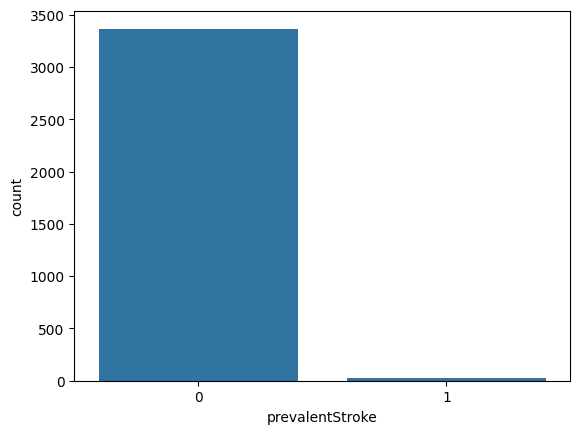

In [4]:
sns.countplot(x="prevalentStroke",data=heart_data)

<Axes: xlabel='prevalentHyp', ylabel='count'>

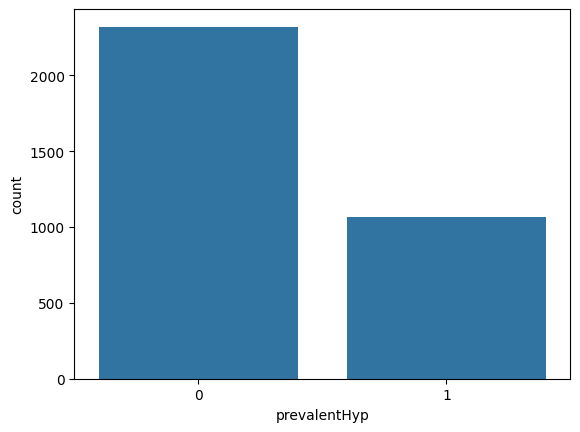

In [5]:
sns.countplot(x="prevalentHyp",data=heart_data)

# Finding null values

In [6]:
heart_data.isnull()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3388,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [7]:
heart_data.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


# Ploting heatmap

<Axes: >

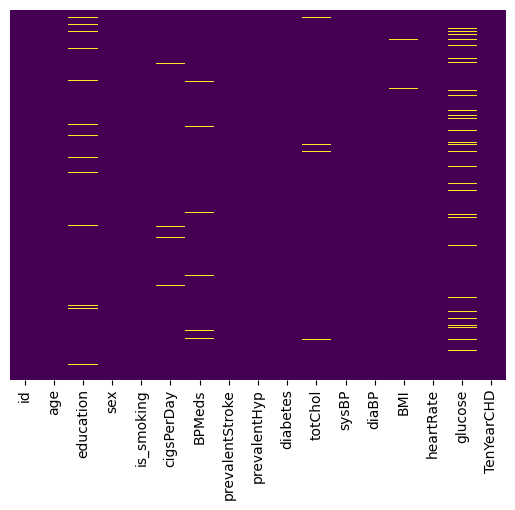

In [8]:
sns.heatmap(heart_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

# Droping values

In [9]:
heart_data.drop(['education'],axis=1,inplace=True)
heart_data.head()

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [10]:
m=np.mean(heart_data["glucose"])
print(m)


82.08651976668827


# Replacing null values

In [11]:
heart_data["glucose"].replace(to_replace=np.nan,value=m,inplace=True)
heart_data["BMI"].replace(to_replace=np.nan,value=25,inplace=True)
heart_data["cigsPerDay"].replace(to_replace=np.nan,value=5,inplace=True)
heart_data["heartRate"].replace(to_replace=np.nan,value=90,inplace=True)
heart_data.drop("is_smoking",axis=1,inplace=True)

<Axes: ylabel='Frequency'>

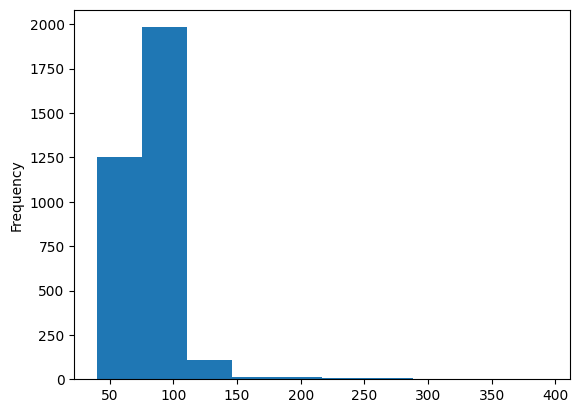

In [12]:
heart_data["glucose"].plot.hist()

In [13]:
heart_data.head(10)

,id,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,F,3.0,0.0,0,0,0,221.0,148.0,85.0,25.00,90.0,80.00000,1
1,1,36,M,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.00000,0
2,2,46,F,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.00000,0
3,3,50,M,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.00000,1
4,4,64,F,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.00000,0
5,5,61,F,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.00000,1
6,6,61,M,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.00000,0
7,7,36,M,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.00000,0
8,8,41,F,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.00000,0
9,9,55,F,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,82.08652,0


<Axes: >

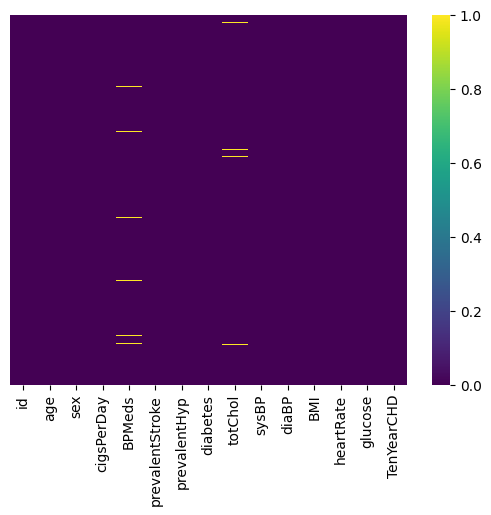

In [14]:
sns.heatmap(heart_data.isnull(), yticklabels=False,cmap='viridis')

In [15]:
heart_data["totChol"].replace(to_replace = np.nan, value=247.0,inplace=True)
heart_data.drop("BPMeds",axis=1,inplace=True)

<Axes: >

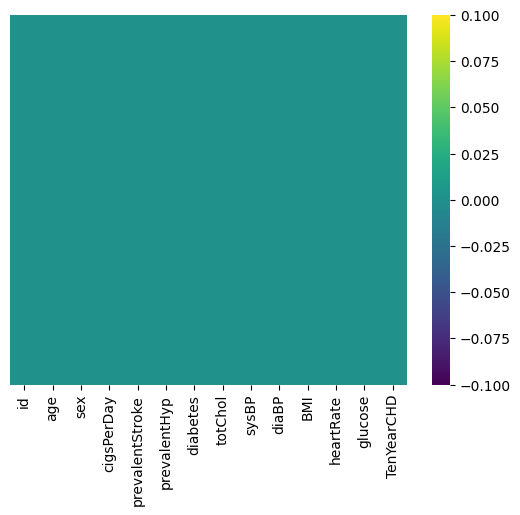

In [16]:
sns.heatmap(heart_data.isnull(), yticklabels=False,cmap='viridis')

In [17]:
heart_data.isnull().sum()

,0
id,0
age,0
sex,0
cigsPerDay,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0
diaBP,0


<Axes: xlabel='TenYearCHD', ylabel='count'>

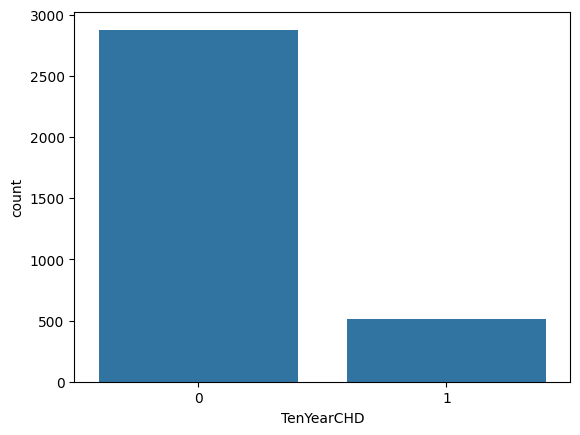

In [18]:
sns.countplot(x = "TenYearCHD" , data = heart_data)

In [19]:
x = heart_data.drop(columns="TenYearCHD",axis=1)
y = heart_data["TenYearCHD"].values
x
y

array([1, 0, 0, ..., 1, 0, 0])

# Train and Test

In [24]:
from sklearn.preprocessing import OneHotEncoder

string_cols = x.select_dtypes(include='object').columns

ohe = OneHotEncoder(handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(x[string_cols]).toarray())

feature_names = ohe.get_feature_names_out(string_cols)
ohe_df.columns = feature_names

x = x.drop(string_cols, axis=1)
x = pd.concat([x, ohe_df], axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15)

x_train.columns = x_train.columns.astype(str)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train,y_train)

x_test.columns = x_test.columns.astype(str)

y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8185840707964602
Precision Score : 1.0
Recall Score : 0.016
F1 Score : 0.031496062992125984
Confusion Matrix : 
[[553   0]
 [123   2]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.model_selection import GridSearchCV
clf=LogisticRegression()
grid_values={'penalty': ['l1','l2'],'C':  [0.001,0.009,0.01,0.09,1,5,10,25,15,100]} # Changed keys to strings 'penalty' and 'C'
grid_clf_acc=GridSearchCV(clf,param_grid=grid_values,scoring='accuracy')
grid_clf_acc.fit(x_train,y_train)

y_pred=grid_clf_acc.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# Accuracy score

In [27]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8200589970501475